# Neural Network Quick Build


In [3]:
!pip install termcolor

  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 2. Load Dataset

In [4]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 304s 2us/step
50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


## 3. Map Class Number to Class Name

In [5]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

## 4. Plot Samples Along with Their Class Names

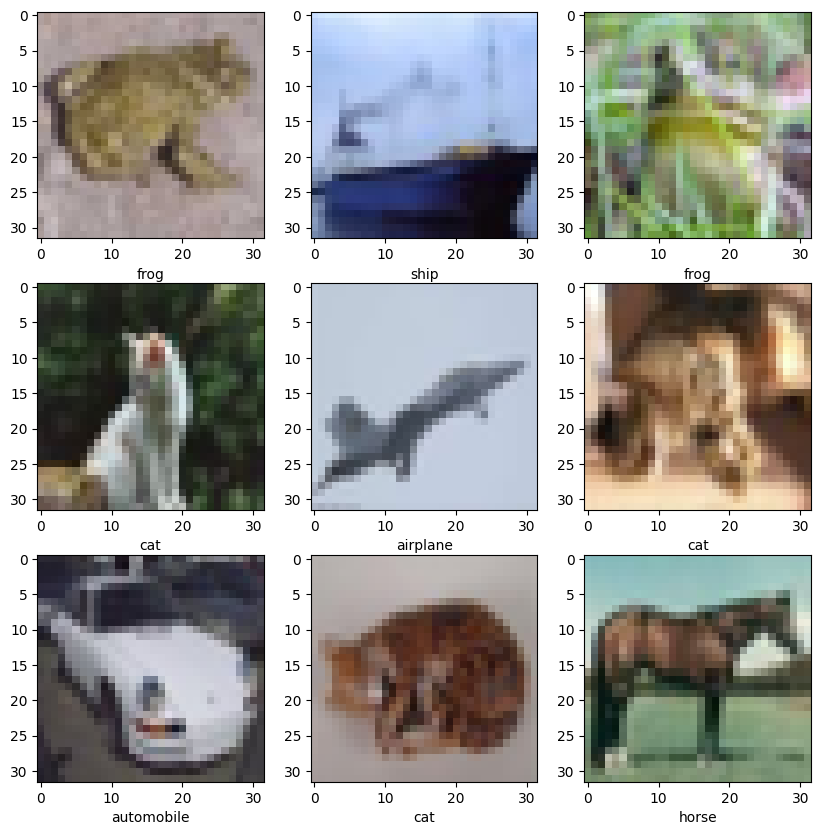

In [6]:
# select a random set of 9 images
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each sample
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_train[i + idx]) 
    plt.xlabel(class_names[(y_train[i + idx][0])])

# display results
plt.show()

## 5. Normalize Samples

In [7]:
# pixel values before normalization
print("before normalization:\n", x_train[0][0][0])

before normalization:
 [59 62 63]


In [8]:
# normalize pixel values
x_train = x_train / 255.
x_test = x_test / 255.
# pixel values after normalization
print("after normalization:\n", x_train[0][0][0])

after normalization:
 [0.23137255 0.24313725 0.24705882]


## 6. One Hot Encode Labels

In [9]:
# label values before one hot encoding
print("before one hot:")
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))

before one hot:
class 6 represents a frog


In [10]:
from keras.utils import to_categorical

# one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# label values after one hot encoding
print("after one hot:")
print("class {} represents a {}".format(y_train[0], class_names[np.argmax(y_train[0])]))

after one hot:
class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


## 7. Define Neural Network

In [11]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
    
    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

In [12]:
# create model
model = build_model()
# see model details
model.summary()

c:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,314 (618.41 KB)

 Trainable params: 158,314 (618.41 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Train Model

### 8.1 Perform Training

In [13]:
%%time
# train model
history = model.fit(x_train, y_train, epochs=10)
# save model to file
model.save('baseline.keras')

# access metrics from training history
print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 22ms/step - accuracy: 0.3924 - loss: 1.6658
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.6120 - loss: 1.1077
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6704 - loss: 0.9397
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.7005 - loss: 0.8495
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7251 - loss: 0.7799
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7441 - loss: 0.7250
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - accuracy: 0.7638 - loss: 0.6760
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7731 - loss: 0.6357
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7900 - loss: 0.5912
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8068 - loss: 0.5501

initial accuracy: 0.4858599901199341 | latest accuracy: 0.8004800081253052
initial loss: 1.4280416

### 8.2 Plot Training Results

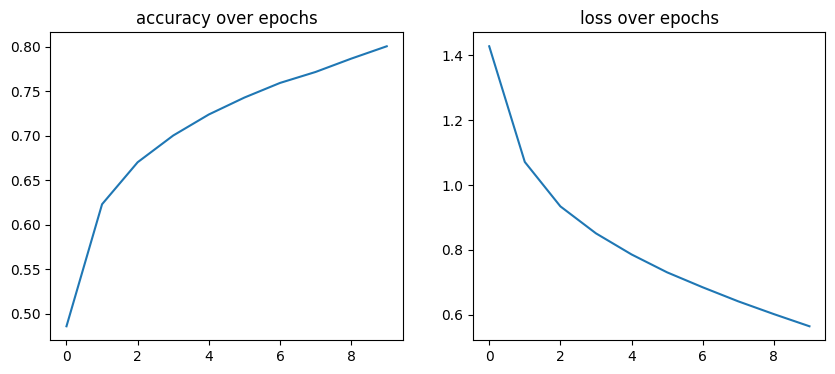

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(10,4)) 
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

## 9. Test Model

### 9.1 Evaluation on Test Set

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.6904 - loss: 0.9712

test accuracy score: 0.6904000043869019


### 9.2 Fetch Predictions for Every Sample

In [16]:
predictions = model.predict(x_test)
# fetch probabilities for each class
print("\nprediction probabilities per class:\n", predictions[0])
# fetch class with the highest probability
print("\npredicted class:", np.argmax(predictions[0]))
print("actual class:", np.argmax(y_test[0]))
# fetch readable class name
print("predicted class name:", class_names[np.argmax(predictions[0])])
# compare with original label
print("actual class name:", class_names[np.argmax(y_test[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step

prediction probabilities per class:
 [6.8537374e-05 1.1874031e-04 1.3553497e-04 7.3710310e-01 7.1898918e-05
 2.5591016e-01 5.0211296e-04 7.9635056e-06 5.0024460e-03 1.0794589e-03]

predicted class: 3
actual class: 3
predicted class name: cat
actual class name: cat


### 9.3 Plot Predictions

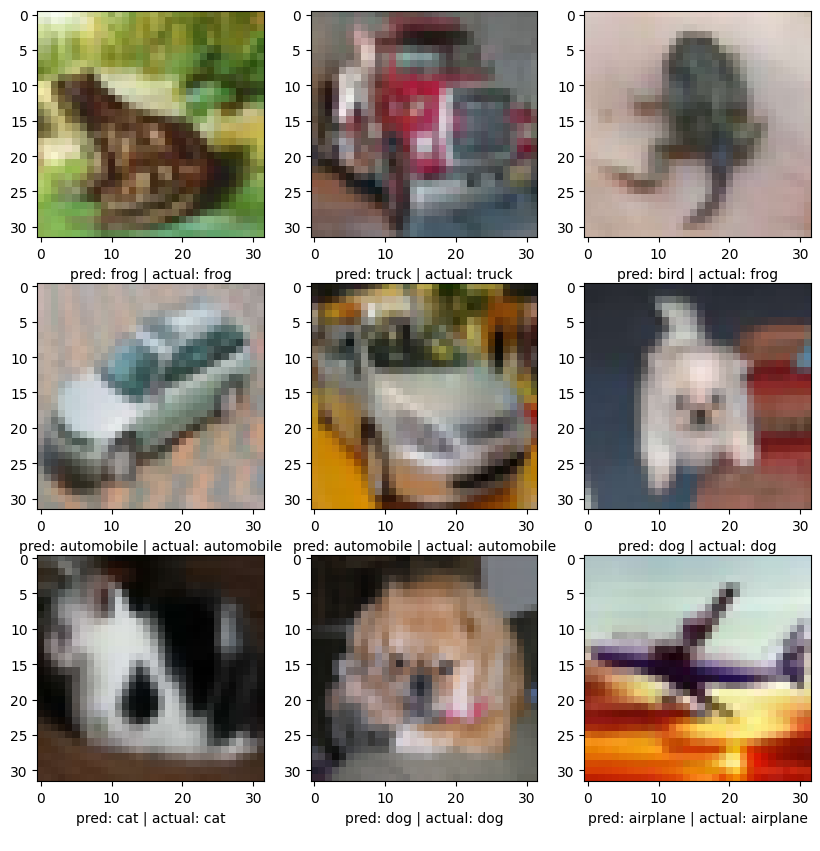

In [17]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()